# Inicialmente Entrenamos una regresión lineal

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Cargar los datos
df = pd.read_csv("/Users/edissonpenagosospina/Downloads/dataSet.csv")

# Opcional: trabajar con una muestra más pequeña para pruebas rápidas
#df_sample = df.sample(n=50000, random_state=42)

# Separar features y target
X = df.drop(columns=["log_amount"])
y = df["log_amount"]

# Dividir en entrenamiento y prueba (80/20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entrenar regresión lineal
model = LinearRegression()
model.fit(X_train, y_train)

# Predecir
y_pred = model.predict(X_test)

# Evaluación en escala original (revirtiendo log1p con expm1)
y_test_original = np.expm1(y_test)
y_pred_original = np.expm1(y_pred)

mae = mean_absolute_error(y_test_original, y_pred_original)
rmse = np.sqrt(mean_squared_error(y_test_original, y_pred_original))
r2 = r2_score(y_test, y_pred)  # Este sí se evalúa en log escala

# Mostrar resultados
print("Evaluación del modelo (escala original):")
print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R² (log escala): {r2:.4f}")

Evaluación del modelo (escala original):
MAE: 37.14
RMSE: 76.00
R² (log escala): 0.0853


# Se prueba con random forest regressor debido a que la regresión lineal no es capaz de capturar la no linealidad de los datos.

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Cargar los datos
df = pd.read_csv("/Users/edissonpenagosospina/Downloads/dataSet.csv")

# Trabajar con una muestra más pequeña para pruebas
df_sample = df.sample(7000000, random_state=42)

# Separar features y target
X = df_sample.drop(columns=["log_amount"])
y = df_sample["log_amount"]

# Dividir en entrenamiento y prueba (80/20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entrenar Random Forest
rf_model = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
rf_model.fit(X_train, y_train)

# Predecir
y_pred = rf_model.predict(X_test)

# Evaluación en escala original
y_test_original = np.expm1(y_test)
y_pred_original = np.expm1(y_pred)

mae = mean_absolute_error(y_test_original, y_pred_original)
rmse = np.sqrt(mean_squared_error(y_test_original, y_pred_original))
r2 = r2_score(y_test, y_pred)

# Mostrar resultados
print("Evaluación del modelo Random Forest (escala original):")
print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R² (log escala): {r2:.4f}")

# Error absoluto en escala original
errors = np.abs(np.expm1(y_test) - np.expm1(y_pred))

# Porcentaje de predicciones con error < $10
accuracy_10usd = np.mean(errors < 10) * 100

print(f"Porcentaje de predicciones con error menor a $10: {accuracy_10usd:.2f}%")

Evaluación del modelo Random Forest (escala original):
MAE: 13.35
RMSE: 33.99
R² (log escala): 0.8781
Porcentaje de predicciones con error menor a $10: 66.77%


               feature  importance
14                 mcc    0.347501
10         merchant_id    0.126722
4     transaction_hour    0.120199
36   per_capita_income    0.052018
5            client_id    0.030528
38          total_debt    0.024597
34            latitude    0.023978
39        credit_score    0.023956
37       yearly_income    0.022821
35           longitude    0.022719
2      transaction_day    0.020784
29      retirement_age    0.015675
1    transaction_month    0.015003
31         birth_month    0.014333
11  merchant_city_freq    0.013872
25        credit_limit    0.013157
30          birth_year    0.013058
13                 zip    0.012938
0     transaction_year    0.012576
28         current_age    0.012001


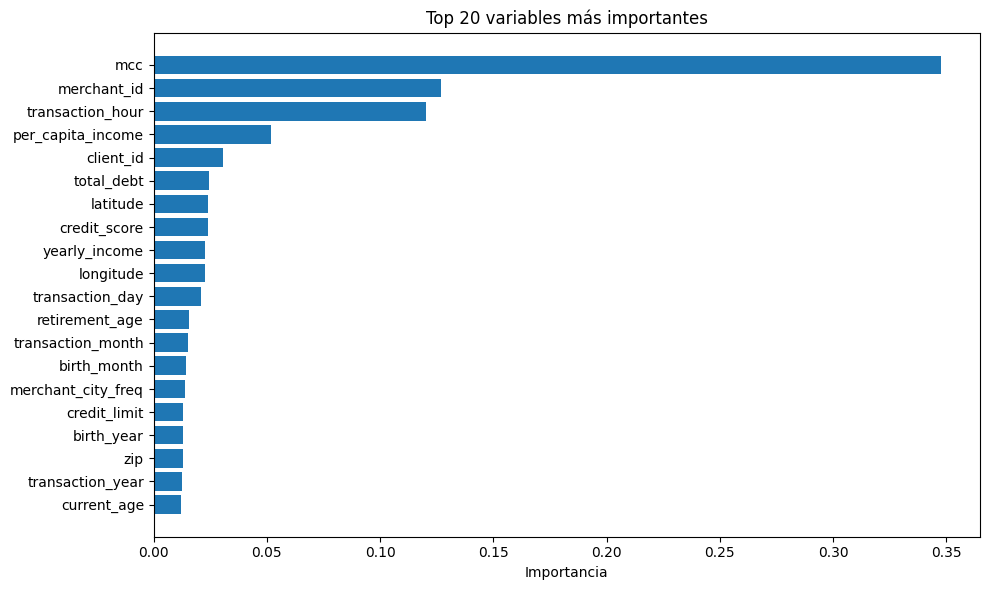

In [2]:
import matplotlib.pyplot as plt

# Obtener la importancia de las variables
importances = rf_model.feature_importances_
feature_names = X_train.columns

# Crear un DataFrame ordenado por importancia
importances_df = pd.DataFrame({
    'feature': feature_names,
    'importance': importances
}).sort_values(by='importance', ascending=False)

# Mostrar las 20 más importantes
print(importances_df.head(20))

# Gráfico de barras
plt.figure(figsize=(10, 6))
plt.barh(importances_df.head(20)['feature'], importances_df.head(20)['importance'])
plt.gca().invert_yaxis()
plt.xlabel("Importancia")
plt.title("Top 20 variables más importantes")
plt.tight_layout()
plt.show()

### Ahora voy a reducir el dataSet a las 30 columnas mas relevantes en el modelo para hacerlo mas lijero y poder entrenar el modelo con todos los registros

In [3]:
list_feature = importances_df['feature'].head(30).reset_index(drop=True).to_list()
list_feature.append('log_amount')

In [4]:
list_feature

['mcc',
 'merchant_id',
 'transaction_hour',
 'per_capita_income',
 'client_id',
 'total_debt',
 'latitude',
 'credit_score',
 'yearly_income',
 'longitude',
 'transaction_day',
 'retirement_age',
 'transaction_month',
 'birth_month',
 'merchant_city_freq',
 'credit_limit',
 'birth_year',
 'zip',
 'transaction_year',
 'current_age',
 'transaction_weekday',
 'num_credit_cards',
 'merchant_state_freq',
 'card_id',
 'acct_open_date_year',
 'card_type_Credit',
 'acct_open_date_month',
 'gender_Female',
 'gender_Male',
 'num_cards_issued',
 'log_amount']

In [ ]:
df.loc[:, df.columns.isin(list_feature)]

,transaction_year,transaction_month,transaction_day,transaction_weekday,transaction_hour,client_id,card_id,merchant_id,merchant_city_freq,merchant_state_freq,...,gender_Female,gender_Male,latitude,longitude,per_capita_income,yearly_income,total_debt,credit_score,num_credit_cards,log_amount
0,2010,1,1,4,0,561,4575,67570,0.002653,1.211950,...,0,1,40.80,-91.12,18076,36853,112139,834,5,2.745346
1,2010,1,1,4,0,1129,102,27092,0.047468,10.725208,...,0,1,33.18,-117.29,16894,34449,36540,686,3,4.394449
2,2010,1,1,4,0,430,2860,27092,0.129446,2.348354,...,1,0,41.42,-87.35,26168,53350,128676,685,5,5.303305
3,2010,1,1,4,0,848,3915,13051,0.020404,1.456315,...,0,1,38.86,-76.60,33529,68362,96182,711,2,3.858833
4,2010,1,1,4,0,1807,165,20519,0.393584,6.444577,...,1,0,40.84,-73.87,25537,52065,98613,828,5,1.759581
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12645861,2019,10,31,3,23,1718,2379,86438,0.066865,10.725208,...,1,0,34.02,-117.89,22681,33483,196,698,5,0.746688
12645862,2019,10,31,3,23,1766,2066,39261,11.751916,11.751916,...,0,1,43.06,-87.96,9995,20377,12092,789,4,2.624669
12645863,2019,10,31,3,23,199,1031,2925,0.094740,7.592165,...,1,0,33.10,-96.66,32580,78329,40161,720,3,3.724247
12645864,2019,10,31,3,23,1986,5443,46284,0.041395,10.725208,...,1,0,37.68,-122.43,23752,48430,62384,716,2,1.609438


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Cargar los datos
df = pd.read_csv("/Users/edissonpenagosospina/Downloads/dataSet.csv")

list_feature = ['mcc', 'merchant_id', 'transaction_hour', 'per_capita_income', 'client_id', 'total_debt',
 'latitude', 'credit_score', 'yearly_income', 'longitude', 'transaction_day', 'retirement_age',
 'transaction_month', 'birth_month', 'merchant_city_freq', 'credit_limit', 'birth_year', 'zip',
 'transaction_year', 'current_age', 'log_amount']

df_light = df.loc[:, df.columns.isin(list_feature)]


# Trabajar con una muestra más pequeña para pruebas
df_sample = df.sample(n=9000000, random_state=42)

# Separar features y target
X = df_sample.drop(columns=["log_amount"])
y = df_sample["log_amount"]

# Dividir en entrenamiento y prueba (80/20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entrenar Random Forest
rf_model = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
rf_model.fit(X_train, y_train)

# Predecir
y_pred = rf_model.predict(X_test)

# Evaluación en escala original
y_test_original = np.expm1(y_test)
y_pred_original = np.expm1(y_pred)

mae = mean_absolute_error(y_test_original, y_pred_original)
rmse = np.sqrt(mean_squared_error(y_test_original, y_pred_original))
r2 = r2_score(y_test, y_pred)

# Mostrar resultados
print("Evaluación del modelo Random Forest (escala original):")
print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R² (log escala): {r2:.4f}")

# Error absoluto en escala original
errors = np.abs(np.expm1(y_test) - np.expm1(y_pred))

# Porcentaje de predicciones con error < $10
accuracy_10usd = np.mean(errors < 10) * 100

print(f"Porcentaje de predicciones con error menor a $10: {accuracy_10usd:.2f}%")

# Se prueba el modelo lightgbm

In [4]:
import pandas as pd
import numpy as np
from lightgbm import LGBMRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import os
import matplotlib.pyplot as plt

# (Opcional) Para solucionar problemas con libomp en macOS
#os.environ['DYLD_LIBRARY_PATH'] = '/opt/homebrew/opt/libomp/lib'

# Cargar el dataset
df = pd.read_csv("/Users/edissonpenagosospina/Downloads/dataSet.csv")

# Usar una muestra para entrenamiento rápido (ajusta n si quieres más datos)
# df_sample = df.sample(n=50000, random_state=42)
print("demensionalidad del dataFrame" , df.shape)
# Separar features y target
X = df.drop(columns=["log_amount"])
y = df["log_amount"]

# Dividir en entrenamiento y prueba (80/20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear y entrenar el modelo LightGBM
model = LGBMRegressor(
    n_estimators=100,
    learning_rate=0.1,
    num_leaves=31,
    random_state=42,
    n_jobs=-1
)

model.fit(X_train, y_train)

# Predicción
y_pred = model.predict(X_test)

# Evaluación en escala original (invirtiendo log1p → expm1)
y_test_original = np.expm1(y_test)
y_pred_original = np.expm1(y_pred)

mae = mean_absolute_error(y_test_original, y_pred_original)
rmse = np.sqrt(mean_squared_error(y_test_original, y_pred_original))
r2 = r2_score(y_test, y_pred)  # En log escala

# Mostrar resultados
print("📊 Evaluación del modelo LightGBM:")
print(f"MAE (escala original): {mae:.2f}")
print(f"RMSE (escala original): {rmse:.2f}")
print(f"R² (log escala): {r2:.4f}")


demensionalidad del dataFrame (12645866, 42)
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.166022 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3604
[LightGBM] [Info] Number of data points in the train set: 10116692, number of used features: 41
[LightGBM] [Info] Start training from score 3.294205
📊 Evaluación del modelo LightGBM:
MAE (escala original): 24.42
RMSE (escala original): 52.03
R² (log escala): 0.6132


In [5]:
from sklearn.model_selection import GridSearchCV
from lightgbm import LGBMRegressor

# Tomar una muestra más manejable para tuning
df_sample = df.sample(n=100000, random_state=42)
X = df_sample.drop(columns=["log_amount"])
y = df_sample["log_amount"]

# Dividir
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Definir el modelo base
lgb_model = LGBMRegressor(random_state=42, n_jobs=-1)

# Definir el grid de hiperparámetros
param_grid = {
    "num_leaves": [31, 50],
    "learning_rate": [0.05, 0.1],
    "n_estimators": [100, 200],
    "max_depth": [-1, 10]
}

# Ejecutar Grid Search
grid = GridSearchCV(
    estimator=lgb_model,
    param_grid=param_grid,
    scoring="neg_mean_absolute_error",  # se puede cambiar por "neg_root_mean_squared_error"
    cv=3,
    verbose=1
)

grid.fit(X_train, y_train)

# Mostrar los mejores parámetros encontrados
print("🔍 Mejores hiperparámetros encontrados:")
print(grid.best_params_)

# Evaluar el mejor modelo
best_model = grid.best_estimator_
y_pred = best_model.predict(X_test)

# Escala original
y_test_original = np.expm1(y_test)
y_pred_original = np.expm1(y_pred)

mae = mean_absolute_error(y_test_original, y_pred_original)
rmse = np.sqrt(mean_squared_error(y_test_original, y_pred_original))
r2 = r2_score(y_test, y_pred)

print("\n📊 Evaluación del mejor modelo (tuneado):")
print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R² (log escala): {r2:.4f}")


Fitting 3 folds for each of 16 candidates, totalling 48 fits
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001643 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3567
[LightGBM] [Info] Number of data points in the train set: 53333, number of used features: 41
[LightGBM] [Info] Start training from score 3.299256
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001425 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3570
[LightGBM] [Info] Number of data points in the train set: 53333, number of used features: 41
[LightGBM] [Info] St

In [8]:
import pandas as pd
import numpy as np
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import os

# (Solo si estás en Mac y necesitas libomp)
# os.environ['DYLD_LIBRARY_PATH'] = '/opt/homebrew/opt/libomp/lib'

# Cargar el dataset completo
df = pd.read_csv("/Users/edissonpenagosospina/Downloads/dataSet.csv")
print(f"📦 Dataset cargado: {df.shape}")

# Separar features y variable objetivo
X = df.drop(columns=["log_amount"])
y = df["log_amount"]

# Hiperparámetros óptimos encontrados
best_params = {
    "learning_rate": 0.1,
    "max_depth": -1,
    "n_estimators": 200,
    "num_leaves": 50
}

# Inicializar modelo final
final_model = LGBMRegressor(
    **best_params,
    random_state=42,
    n_jobs=-1
)

print("🚀 Entrenando modelo final con todos los datos...")
final_model.fit(X, y)

# Evaluar el modelo sobre una muestra aleatoria del 5%
X_sample = X.sample(frac=0.05, random_state=42)
y_sample = y.loc[X_sample.index]
y_pred = final_model.predict(X_sample)

# Volver a la escala original
y_true_original = np.expm1(y_sample)
y_pred_original = np.expm1(y_pred)

# Métricas
mae = mean_absolute_error(y_true_original, y_pred_original)
rmse = np.sqrt(mean_squared_error(y_true_original, y_pred_original))
r2 = r2_score(y_sample, y_pred)

print("\n📊 Evaluación del modelo LightGBM (entrenado con todo el dataset):")
print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R² (log escala): {r2:.4f}")

# Pasar a escala original
y_true_original = np.expm1(y_sample)
y_pred_original = np.expm1(y_pred)

# Calcular el error absoluto
errors = np.abs(y_true_original - y_pred_original)

# Calcular el porcentaje con error < $10
accuracy_10usd = np.mean(errors < 10) * 100

print(f"✅ Porcentaje de predicciones con error menor a $10: {accuracy_10usd:.2f}%")

📦 Dataset cargado: (12645866, 42)
🚀 Entrenando modelo final con todos los datos...
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.224245 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3608
[LightGBM] [Info] Number of data points in the train set: 12645866, number of used features: 41
[LightGBM] [Info] Start training from score 3.294010

📊 Evaluación del modelo LightGBM (entrenado con todo el dataset):
MAE: 22.23
RMSE: 48.96
R² (log escala): 0.6905
✅ Porcentaje de predicciones con error menor a $10: 49.19%


# Se concluye que la mejor opcion es el random forest teniendo en cuenta que tuvo los mejores resultados entrenandolo solo con la mitad de los datos debido a que no se cuenta con el poder de computo para hacerlo con el total del dataSet

Este puede mejorar ajustando los hiperParametros

# Es muy relevante para entender el comportamiento de los clientes lo que mas influye en el mondo que gastan: se listan las primeras cinco variables mas importante:

- mcc
- merchant_id
- transaction_hour
- per_capita_income
- total_debt